In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
os.listdir()

['bsi.ipynb',
 'cbsi.csv',
 'commodities.csv',
 'crude.ipynb',
 'data',
 'energy.csv',
 'export_price_index.csv',
 'fx.ipynb',
 'gdp.csv',
 'gpd_proxy.csv',
 'inventory_cycle.csv',
 'ipi.csv',
 'ipi_cbsi.csv',
 'ipi_q.csv',
 'machine_noship.csv',
 'real_gdp.csv',
 'shipment_inventory_index.csv',
 'test1.ipynb',
 'vkospi_12.csv',
 'vkospi관련.ipynb',
 'yield_spread.ipynb',
 '소비(내구재).csv',
 '전산업_(출하_재고)_comparison.ipynb',
 '전산업_기계류내수출하지수(선박제외)_comparison.ipynb',
 '전산업_내구재판매액_comparison.ipynb',
 '전산업_설비투자전망BSI(대기업_중소기업)_comparison.ipynb',
 '전산업_수출금액지수_comparison.ipynb',
 '전산업생산지수(계절조정지수).csv',
 '전산업생산지수_경기변동시각화.png',
 '전산업생산지수_데이터 처리 및 시각화 코드.py']

In [35]:
os.getcwd()

'c:\\Users\\tmdal\\ls_quant1\\week3\\2025.08_LS_Quant_1\\week3'

In [36]:
dir = os.getcwd()

In [37]:
crude = pd.read_csv(dir+'/data/crude.csv')

In [38]:
crude

,통계표,계정항목,단위,변환,2003/01,2003/02,2003/03,2003/04,2003/05,2003/06,...,2024/09,2024/10,2024/11,2024/12,2025/01,2025/02,2025/03,2025/04,2025/05,2025/06
0,8.4.11. 석유제품수급,생산,천배럴,원자료,"78,826","71,319","74,847","67,194","67,680","67,214",...,"105,442","105,598","102,764","105,207","108,030","96,276","99,328","105,171","107,123","103,019"
1,8.4.11. 석유제품수급,국내소비,천배럴,원자료,"75,356","65,646","65,378","56,246","59,662","60,051",...,"78,872","84,366","77,292","81,877","78,812","72,561","78,010","77,108","75,022","76,746"
2,8.4.11. 석유제품수급,수입,천배럴,원자료,"98,130","82,302","96,696","83,607","77,976","65,861",...,"112,449","118,924","115,227","114,356","125,903","109,355","109,399","110,308","125,379","113,295"
3,8.4.11. 석유제품수급,수출,천배럴,원자료,"17,083","18,819","21,014","19,597","16,613","16,608",...,"43,922","38,744","41,422","42,066","37,289","39,930","38,423","40,505","45,111","43,403"


In [39]:
crude.columns

Index(['통계표', '계정항목', '단위', '변환', '2003/01', '2003/02', '2003/03', '2003/04',
       '2003/05', '2003/06',
       ...
       '2024/09', '2024/10', '2024/11', '2024/12', '2025/01', '2025/02',
       '2025/03', '2025/04', '2025/05', '2025/06'],
      dtype='object', length=274)

In [40]:
drops = ['통계표', '계정항목', '단위', '변환']
crude.drop(columns=drops, inplace=True)


In [41]:
crude = crude.T

In [42]:
crude.columns = ['생산', '국내소비', '수입', '수출']

In [43]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 2003/01 to 2025/06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   생산      270 non-null    object
 1   국내소비    270 non-null    object
 2   수입      270 non-null    object
 3   수출      270 non-null    object
dtypes: object(4)
memory usage: 10.5+ KB


In [44]:
for a in crude.columns:
    crude[a] = crude[a].str.replace(',', '')
    crude[a] = crude[a].astype('float')


In [45]:
crude['수입 중 생산 비중'] = crude['생산'].div(crude['수입'])

<Axes: >

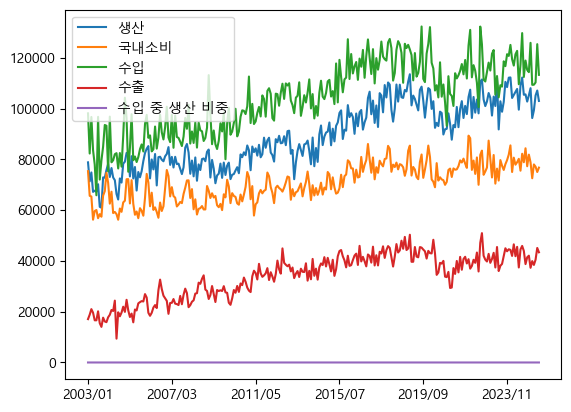

In [46]:
plt.rcParams['font.family'] = 'Malgun Gothic'
crude.plot(
    
)

<Axes: >

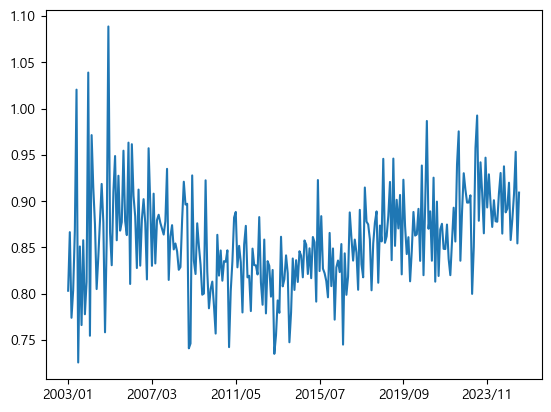

In [47]:
crude['수입 중 생산 비중'].plot()

In [48]:
#에너지 생산 데이터
energy = pd.read_csv(dir+'/data/energy.csv')

In [49]:
energy.columns

Index(['통계표', '계정항목', '단위', '변환', '2003/01', '2003/02', '2003/03', '2003/04',
       '2003/05', '2003/06',
       ...
       '2024/07', '2024/08', '2024/09', '2024/10', '2024/11', '2024/12',
       '2025/01', '2025/02', '2025/03', '2025/04'],
      dtype='object', length=272)

In [50]:
drops = ['통계표', '계정항목', '단위', '변환']
energy.drop(columns=drops, inplace=True)

In [51]:
energy = energy.T

In [52]:
energy.columns = ['합계', '석탄', '가스', '석유', '원자력', '수력', '바이오및폐기물', '지열태양열및 기타', '열']

In [53]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 2003/01 to 2025/04
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   합계         268 non-null    object
 1   석탄         268 non-null    object
 2   가스         268 non-null    object
 3   석유         268 non-null    object
 4   원자력        268 non-null    object
 5   수력         268 non-null    object
 6   바이오및폐기물    268 non-null    object
 7   지열태양열및 기타  268 non-null    object
 8   열          268 non-null    object
dtypes: object(9)
memory usage: 20.9+ KB


In [54]:
#숫자로 바꿔주기
for a in energy.columns:
    energy[a] = energy[a].str.replace(',', '')
    energy[a] = energy[a].astype('float')


In [55]:
#전체 중에 석유비율
energy['석유비율'] = energy['석유'].div(energy['합계'])

<Axes: >

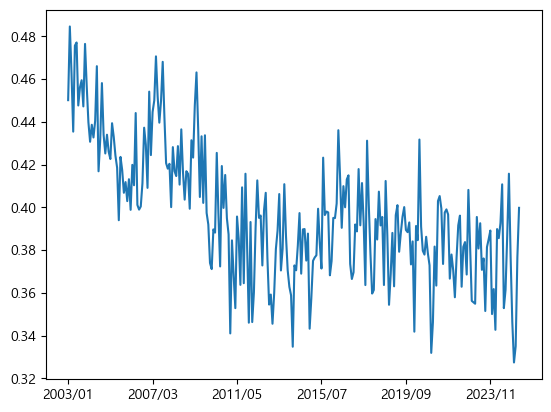

In [56]:
energy['석유비율'].plot()

In [57]:
energy.tail(5)

,합계,석탄,가스,석유,원자력,수력,바이오및폐기물,지열태양열및 기타,열,석유비율
2024/12,28255.0,6580.0,6802.0,9789.0,3560.0,45.0,798.0,674.0,6.0,0.346452
2025/01,27682.0,6211.0,7096.0,9065.0,3811.0,47.0,782.0,661.0,8.0,0.327469
2025/02,25653.0,4938.0,7116.0,8596.0,3457.0,41.0,731.0,770.0,5.0,0.335088
2025/03,24450.0,4383.0,5396.0,9206.0,3806.0,43.0,753.0,857.0,6.0,0.376524
2025/04,23064.0,3957.0,4682.0,9221.0,3393.0,53.0,757.0,995.0,6.0,0.399801


In [58]:
energy.to_csv('energy.csv')

In [59]:
energy.index = pd.to_datetime(energy.index)

C:\Users\tmdal\AppData\Local\Temp\ipykernel_27256\2871981767.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  energy.index = pd.to_datetime(energy.index)


In [60]:
energy_5y = energy.resample('Y').mean()

C:\Users\tmdal\AppData\Local\Temp\ipykernel_27256\705010785.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  energy_5y = energy.resample('Y').mean()


In [61]:
energy_5y.index.year

Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
      dtype='int32')

In [62]:
energy_5y.columns

Index(['합계', '석탄', '가스', '석유', '원자력', '수력', '바이오및폐기물', '지열태양열및 기타', '열',
       '석유비율'],
      dtype='object')

### 원자재 가격 데이터

In [67]:
#원자재 가격 데이터
comm = pd.read_csv(dir+'/data/commodities.csv')

In [68]:
comm

,통계표,계정항목,단위,변환,2003/01,2003/02,2003/03,2003/04,2003/05,2003/06,...,2024/09,2024/10,2024/11,2024/12,2025/01,2025/02,2025/03,2025/04,2025/05,2025/06
0,9.1.6.3. 국제상품가격,원유- WTI,달러/배럴,원자료,32.91,35.92,33.22,28.36,28.22,30.72,...,70.44,72.16,69.94,70.15,75.65,71.54,68.24,63.61,62.20,68.54
1,9.1.6.3. 국제상품가격,원유- Dubai,달러/배럴,원자료,27.88,30.20,27.52,23.56,24.32,25.67,...,73.76,76.07,74.09,74.00,80.80,76.32,72.98,68.49,63.61,69.36
2,9.1.6.3. 국제상품가격,원유- Brent,달러/배럴,원자료,30.81,32.66,30.17,25.04,25.71,27.57,...,73.06,75.27,73.51,73.23,78.19,75.19,71.74,66.93,64.09,69.85
3,9.1.6.3. 국제상품가격,천연가스,달러/MMBtu,원자료,5.46,7.86,5.94,5.28,5.81,5.83,...,2.40,2.57,2.99,3.45,3.73,3.75,4.14,3.40,3.46,3.68
4,9.1.6.3. 국제상품가격,철광석,달러/톤,원자료,13.82,13.82,13.82,13.82,13.82,13.82,...,96.24,106.61,103.98,105.34,103.78,108.20,103.65,100.91,100.27,96.17
5,9.1.6.3. 국제상품가격,구리,달러/톤,원자료,"1,650.31","1,682.15","1,655.69","1,587.87","1,651.10","1,685.11",...,"9,259.13","9,533.99","9,075.73","8,909.91","8,976.68","9,330.98","9,735.82","9,172.70","9,531.20","9,835.07"
6,9.1.6.3. 국제상품가격,알루미늄,달러/톤,원자료,"1,379.27","1,421.54","1,386.52","1,334.29","1,400.40","1,410.52",...,"2,457.48","2,595.58","2,582.19","2,540.88","2,571.37","2,655.77","2,651.60","2,367.80","2,447.34","2,525.96"
7,9.1.6.3. 국제상품가격,대두,달러/톤,원자료,208.67,209.61,210.22,221.71,232.41,229.77,...,372.10,368.49,365.52,361.24,377.85,382.08,369.34,378.07,387.65,383.52
8,9.1.6.3. 국제상품가격,소맥,달러/톤,원자료,140.48,141.66,129.25,126.05,131.05,118.16,...,188.51,197.37,185.73,185.79,190.63,190.10,179.61,174.82,196.84,173.19


In [69]:
comm.columns

Index(['통계표', '계정항목', '단위', '변환', '2003/01', '2003/02', '2003/03', '2003/04',
       '2003/05', '2003/06',
       ...
       '2024/09', '2024/10', '2024/11', '2024/12', '2025/01', '2025/02',
       '2025/03', '2025/04', '2025/05', '2025/06'],
      dtype='object', length=274)

In [70]:
drops = ['통계표', '계정항목', '단위', '변환']
comm.drop(columns=drops, inplace=True)
comm = comm.T

In [71]:
col_name = ['wti', 'dubai', 'brent', '천연가스', '철광석', '구리', '알루미늄', '대두', '소맥']
comm.columns = col_name

In [72]:
#숫자로 바꿔주기
for a in comm.columns:
    comm[a] = comm[a].str.replace(',', '')
    comm[a] = comm[a].astype('float')


In [73]:
comm

,wti,dubai,brent,천연가스,철광석,구리,알루미늄,대두,소맥
2003/01,32.91,27.88,30.81,5.46,13.82,1650.31,1379.27,208.67,140.48
2003/02,35.92,30.20,32.66,7.86,13.82,1682.15,1421.54,209.61,141.66
2003/03,33.22,27.52,30.17,5.94,13.82,1655.69,1386.52,210.22,129.25
2003/04,28.36,23.56,25.04,5.28,13.82,1587.87,1334.29,221.71,126.05
2003/05,28.22,24.32,25.71,5.81,13.82,1651.10,1400.40,232.41,131.05
...,...,...,...,...,...,...,...,...,...
2025/02,71.54,76.32,75.19,3.75,108.20,9330.98,2655.77,382.08,190.10
2025/03,68.24,72.98,71.74,4.14,103.65,9735.82,2651.60,369.34,179.61
2025/04,63.61,68.49,66.93,3.40,100.91,9172.70,2367.80,378.07,174.82
2025/05,62.20,63.61,64.09,3.46,100.27,9531.20,2447.34,387.65,196.84


In [74]:
comm.to_csv('commodities.csv')

In [75]:
ipi = pd.read_csv(dir + '/data/ipi_cbsi.csv')

In [76]:
ipi

,Unnamed: 0,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2
0,2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN
1,2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6
2,2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1
3,2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0
4,2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1,0.8
265,2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5,1.2
266,2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7,-0.8
267,2025/05,112.5,86.3,90.0,92.7,87.7,91.4,86.8,93.8,87.9,83.8,87.2,-1.3


In [77]:
ipi.set_index('Unnamed: 0', inplace=True)

In [78]:
dubai = comm.drop(comm.index[0])['dubai']

In [80]:
temp = ipi.join(dubai, how='left')

In [82]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2,dubai
Unnamed: 0,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN,30.20
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6,27.52
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1,23.56
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0,24.32
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9,25.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1,0.8,76.32
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5,1.2,72.98
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7,-0.8,68.49


In [83]:
temp['dubai']

Unnamed: 0
2003/02    30.20
2003/03    27.52
2003/04    23.56
2003/05    24.32
2003/06    25.67
           ...  
2025/02    76.32
2025/03    72.98
2025/04    68.49
2025/05    63.61
2025/06    69.36
Name: dubai, Length: 269, dtype: float64

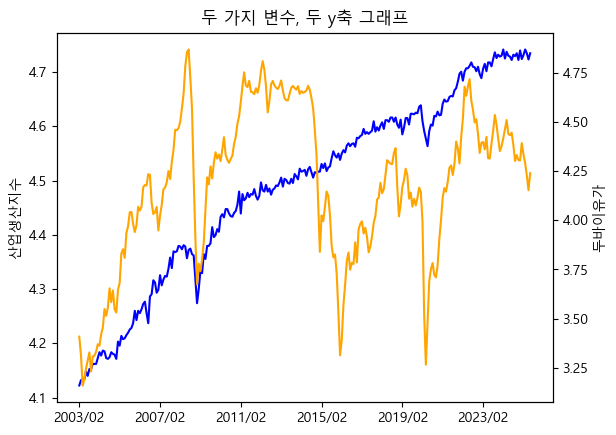

In [84]:
x = temp.index
y1 = np.log(temp['ipi'])
y2 = np.log(temp['dubai'])

fig, ax1 = plt.subplots()                # 첫 번째 y축
ax1.plot(x, y1, color='blue', label='y1')
ax1.set_ylabel('산업생산지수', color='black')

ax2 = ax1.twinx()                        # 두 번째 y축, x축은 공유
ax2.plot(x, y2, color='orange', label='y2')
ax2.set_ylabel('두바이유가', color='black')
plt.xticks(x[::48])
plt.title('두 가지 변수, 두 y축 그래프')
plt.show()

In [85]:
import statsmodels.api as sm
#raw data(변형 안하고 돌림)
x = sm.add_constant(temp['dubai'])
y = temp['ipi']
reg1 = sm.OLS(y, x, missing='drop').fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    ipi   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     30.93
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           6.48e-08
Time:                        14:30:08   Log-Likelihood:                -1093.9
No. Observations:                 269   AIC:                             2192.
Df Residuals:                     267   BIC:                             2199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.9337      2.564     30.000      0.0

In [86]:
# 로그-로그
x = sm.add_constant(np.log(temp['dubai']))
y = np.log(temp['ipi'])
reg2 = sm.OLS(y, x, missing='drop').fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ipi   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     60.13
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           1.87e-13
Time:                        14:30:08   Log-Likelihood:                 119.63
No. Observations:                 269   AIC:                            -235.3
Df Residuals:                     267   BIC:                            -228.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7096      0.101     36.719      0.0

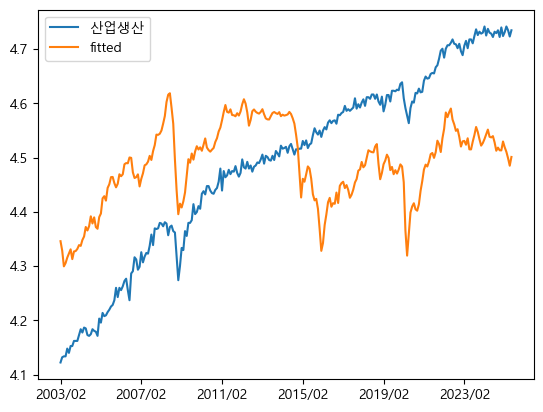

In [87]:
#constant 있을 때 회귀선
x = temp.index
y1 = np.log(temp['ipi'])
y2 = reg2.fittedvalues
plt.plot(x, y1, label = '산업생산')
plt.plot(x, y2, label='fitted')
plt.xticks(x[::48])
plt.legend()
plt.show()

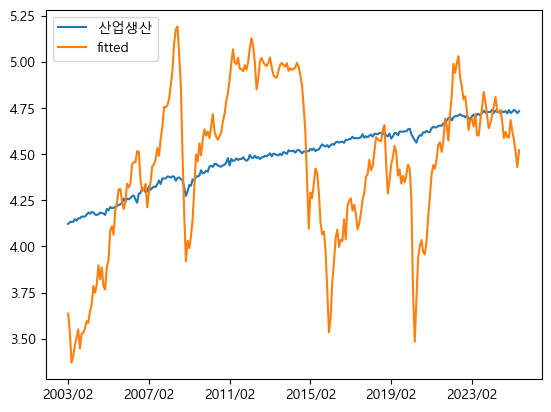

In [88]:
# 로그-로그
x = np.log(temp['dubai'])
y = np.log(temp['ipi'])
reg3 = sm.OLS(y, x, missing='drop').fit()

#constant 없을 때 회귀선
x = temp.index
y1 = np.log(temp['ipi'])
y2 = reg3.fittedvalues
plt.plot(x, y1, label = '산업생산')
plt.plot(x, y2, label='fitted')
plt.xticks(x[::48])
plt.legend()
plt.show()

In [89]:
y2-y1

Unnamed: 0
2003/02   -0.486805
2003/03   -0.595619
2003/04   -0.762963
2003/05   -0.729094
2003/06   -0.685781
             ...   
2025/02   -0.106421
2025/03   -0.164687
2025/04   -0.225421
2025/05   -0.292786
2025/06   -0.211955
Length: 269, dtype: float64

In [90]:
#로그-로그로 두바이유 가격에 시차 1년까지 적용하면서 시행
for i in np.arange(0,13,3):
    x = sm.add_constant(np.log(temp['dubai']))
    y = np.log(temp['ipi'].shift(i))
    reg = sm.OLS(y, x, missing='drop').fit()
    yhat = reg.predict(x)
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')

lag: 0 
 r-square: 0.18381844535739955 
 rmse: 0.15568465254328076
lag: 3 
 r-square: 0.15276182632508128 
 rmse: 0.1577326528532875
lag: 6 
 r-square: 0.11791492680411941 
 rmse: 0.1599472038627695
lag: 9 
 r-square: 0.08341445640814582 
 rmse: 0.1619528482294133
lag: 12 
 r-square: 0.054899869729683415 
 rmse: 0.16333672734841218


In [91]:
#로그-로그로 두바이유 가격에 시차 3년까지 적용하면서 시행
#결과 데이터프레임으로
results_list = []
for i in np.arange(0,37,1):
    x = sm.add_constant(np.log(temp['dubai'])).shift(i)
    y = np.log(temp['ipi'])
    reg = sm.OLS(y, x, missing='drop').fit()
    yhat = reg.predict(x)
    rmse = np.sqrt(reg.mse_resid)
    result_dict = {'lag': i, 'r-square': reg.rsquared, 'rmse': np.sqrt(reg.mse_resid)}
    results_list.append(result_dict)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')
    results_df = pd.DataFrame(results_list)

lag: 0 
 r-square: 0.18381844535739955 
 rmse: 0.15568465254328076
lag: 1 
 r-square: 0.18201717404415585 
 rmse: 0.15481053214561816
lag: 2 
 r-square: 0.17829069493051541 
 rmse: 0.15416033081553798
lag: 3 
 r-square: 0.17259702711612157 
 rmse: 0.1536752077744103
lag: 4 
 r-square: 0.16571950446387895 
 rmse: 0.15326529830432908
lag: 5 
 r-square: 0.1600279466645681 
 rmse: 0.15281753442839688
lag: 6 
 r-square: 0.1545695916715305 
 rmse: 0.15225726870108702
lag: 7 
 r-square: 0.15146111298432863 
 rmse: 0.15154906644377716
lag: 8 
 r-square: 0.14902361188201774 
 rmse: 0.1507531249266823
lag: 9 
 r-square: 0.14663762485371357 
 rmse: 0.1499957097028373
lag: 10 
 r-square: 0.14406258032211638 
 rmse: 0.1492279532185867
lag: 11 
 r-square: 0.14110761554431805 
 rmse: 0.1484650451110927
lag: 12 
 r-square: 0.13880876087333416 
 rmse: 0.14770025650589477
lag: 13 
 r-square: 0.13681354535258783 
 rmse: 0.1469643571311121
lag: 14 
 r-square: 0.13513305367067474 
 rmse: 0.1461303011815251

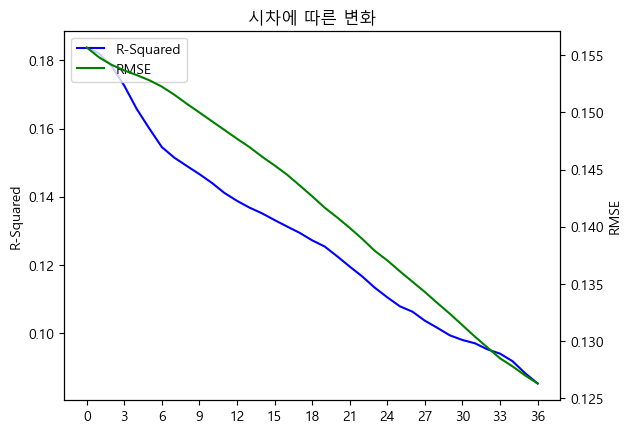

In [92]:
x = results_df['lag']
y1 = results_df['r-square']
y2 = results_df['rmse']


fig, ax1 = plt.subplots()                # 첫 번째 y축
ln1 = ax1.plot(x, y1, label='R-Squared', color='blue')
ax1.set_ylabel('R-Squared', color='black')
ax2 = ax1.twinx()                        # 두 번째 y축, x축은 공유
ln2 = ax2.plot(x, y2, label='RMSE', color='green')
ax2.set_ylabel('RMSE', color='black')

plt.xticks(x[::3])
plt.title('시차에 따른 변화')

# 첫 번째 축 (왼쪽 y축)


# 두 번째 축 (오른쪽 y축)


# 두 축의 plot 객체를 모두 합쳐서 legend 생성
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')


plt.show()

In [96]:
#ADF Test
#vkospi ADF 테스트
#adf 테스트
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries, title):
    """ADF 테스트 수행 및 결과 해석"""
    result = adfuller(timeseries, autolag='AIC')
    
    print(f'=== {title} ADF Test 결과 ===')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print("결과: 정상적(Stationary) - 귀무가설 기각")
    else:
        print("결과: 비정상적(Non-stationary) - 귀무가설 채택")
    print()

In [97]:
adf_test(temp['dubai'], 'dubai')

=== dubai ADF Test 결과 ===
ADF Statistic: -3.191183
p-value: 0.020501
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
결과: 정상적(Stationary) - 귀무가설 기각



### BK 필터 적용해보기

In [112]:
#전산업생산지수 월간 자료에 bk 필터 적용
import statsmodels.api as sm
temp['ipi_filtered'] = sm.tsa.filters.bkfilter(
    np.log(temp['ipi']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)

In [113]:
temp['dubai_filtered'] = sm.tsa.filters.bkfilter(
    np.log(temp['dubai']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)

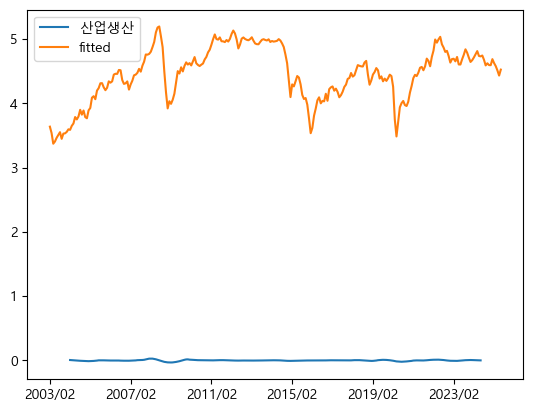

In [114]:
# 필터적용
x = sm.add_constant(temp['dubai_filtered'])
y = temp['ipi_filtered']
reg4 = sm.OLS(y, x, missing='drop').fit()

x = temp.index
y1 = y
y2 = reg3.predict()
plt.plot(x, y1, label = '산업생산')
plt.plot(x, y2, label='fitted')
plt.xticks(x[::48])
plt.legend()
plt.show()

In [115]:
reg4.summary() #bk필터 사용하니까 그래도 괜찮게 나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ipi_filtered   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     326.8
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           7.26e-47
Time:                        14:34:28   Log-Likelihood:                 917.27
No. Observations:                 245   AIC:                            -1831.
Df Residuals:                     243   BIC:                            -1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.655e-05      0.000      0.127      0.899      -0.001       0.001
dubai_filtered     0.0619      0.003     18.077      0.000       0.055       0.069
==============================================================================
Omnibus:                        5.176   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                6.178
Skew:                          -0.164   Prob(JB):                       0.0455
Kurtosis:                       3.706   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
#선행성 전혀 없음
for i in np.arange(0,6,1):
    x = sm.add_constant(temp['dubai_filtered']).shift(i)
    y = temp['ipi_filtered']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')
    

lag: 0 
 r-square: 0.5735211168396853 
 rmse: 0.00574850437400602
lag: 1 
 r-square: 0.45784926532155445 
 rmse: 0.006486368530917547
lag: 2 
 r-square: 0.297966257371747 
 rmse: 0.0073918739476738805
lag: 3 
 r-square: 0.1422571487387404 
 rmse: 0.008185255907915452
lag: 4 
 r-square: 0.03471600527166341 
 rmse: 0.008700825265076447
lag: 5 
 r-square: 9.012599001323451e-05 
 rmse: 0.00887396831957394


### 두바이유 말고 다른거?

In [117]:
comm

,wti,dubai,brent,천연가스,철광석,구리,알루미늄,대두,소맥
2003/01,32.91,27.88,30.81,5.46,13.82,1650.31,1379.27,208.67,140.48
2003/02,35.92,30.20,32.66,7.86,13.82,1682.15,1421.54,209.61,141.66
2003/03,33.22,27.52,30.17,5.94,13.82,1655.69,1386.52,210.22,129.25
2003/04,28.36,23.56,25.04,5.28,13.82,1587.87,1334.29,221.71,126.05
2003/05,28.22,24.32,25.71,5.81,13.82,1651.10,1400.40,232.41,131.05
...,...,...,...,...,...,...,...,...,...
2025/02,71.54,76.32,75.19,3.75,108.20,9330.98,2655.77,382.08,190.10
2025/03,68.24,72.98,71.74,4.14,103.65,9735.82,2651.60,369.34,179.61
2025/04,63.61,68.49,66.93,3.40,100.91,9172.70,2367.80,378.07,174.82
2025/05,62.20,63.61,64.09,3.46,100.27,9531.20,2447.34,387.65,196.84


In [118]:
comm

,wti,dubai,brent,천연가스,철광석,구리,알루미늄,대두,소맥
2003/01,32.91,27.88,30.81,5.46,13.82,1650.31,1379.27,208.67,140.48
2003/02,35.92,30.20,32.66,7.86,13.82,1682.15,1421.54,209.61,141.66
2003/03,33.22,27.52,30.17,5.94,13.82,1655.69,1386.52,210.22,129.25
2003/04,28.36,23.56,25.04,5.28,13.82,1587.87,1334.29,221.71,126.05
2003/05,28.22,24.32,25.71,5.81,13.82,1651.10,1400.40,232.41,131.05
...,...,...,...,...,...,...,...,...,...
2025/02,71.54,76.32,75.19,3.75,108.20,9330.98,2655.77,382.08,190.10
2025/03,68.24,72.98,71.74,4.14,103.65,9735.82,2651.60,369.34,179.61
2025/04,63.61,68.49,66.93,3.40,100.91,9172.70,2367.80,378.07,174.82
2025/05,62.20,63.61,64.09,3.46,100.27,9531.20,2447.34,387.65,196.84


In [119]:
comm['구리'].info()

<class 'pandas.core.series.Series'>
Index: 270 entries, 2003/01 to 2025/06
Series name: 구리
Non-Null Count  Dtype  
--------------  -----  
270 non-null    float64
dtypes: float64(1)
memory usage: 12.3+ KB


In [120]:
temp['wti'] = comm['wti'].iloc[1:]
temp['brent'] = comm['brent'].iloc[1:]

In [121]:
temp['wti']

Unnamed: 0
2003/02    35.92
2003/03    33.22
2003/04    28.36
2003/05    28.22
2003/06    30.72
           ...  
2025/02    71.54
2025/03    68.24
2025/04    63.61
2025/05    62.20
2025/06    68.54
Name: wti, Length: 269, dtype: float64

In [122]:
#일단 굉장히 안좋음
bm = ['wti', 'brent']
for a in bm:
    x = sm.add_constant(temp[a])
    y = temp['ipi']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'name: {a} \n r-square: {reg.rsquared} \n rmse: {rmse}')


name: wti 
 r-square: 0.04913675869311973 
 rmse: 14.599480172416266
name: brent 
 r-square: 0.07782492041971889 
 rmse: 14.377555549350848


In [123]:
#로그 씌워봄
#얘도 안좋음
bm = ['wti', 'brent']
for a in bm:
    x = sm.add_constant(np.log(temp[a]))
    y = np.log(temp['ipi'])
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'name: {a} \n r-square: {reg.rsquared} \n rmse: {rmse}')


name: wti 
 r-square: 0.08767079970497893 
 rmse: 0.16459938247303538
name: brent 
 r-square: 0.1488524540725793 
 rmse: 0.1589845198379762


### WTI랑 브렌트에도 ADF테스트 해보고, BK필터 적용

In [124]:
adf_test(temp['brent'], 'brent')

=== brent ADF Test 결과 ===
ADF Statistic: -3.133867
p-value: 0.024146
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
결과: 정상적(Stationary) - 귀무가설 기각



In [125]:
adf_test(temp['wti'], 'wti')

=== wti ADF Test 결과 ===
ADF Statistic: -3.422803
p-value: 0.010206
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
결과: 정상적(Stationary) - 귀무가설 기각



In [126]:
#bk필터 적용
temp['wti_filtered'] = sm.tsa.filters.bkfilter(
    np.log(temp['wti']),
    low=18,
    high=96,
    K=12)
temp['brent_filtered'] = sm.tsa.filters.bkfilter(
    np.log(temp['brent']),
    low=18,
    high=96,
    K=12)

In [127]:
#필터 적용시킨거 해보기
#얘도 안좋음
bm = ['wti_filtered', 'brent_filtered']
for a in bm:
    x = sm.add_constant(temp[a])
    y = temp['ipi_filtered']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'name: {a} \n r-square: {reg.rsquared} \n rmse: {rmse}')


name: wti_filtered 
 r-square: 0.5783703777296413 
 rmse: 0.0057157293727167335
name: brent_filtered 
 r-square: 0.5667669381905335 
 rmse: 0.0057938453136429065


In [128]:
os.getcwd()

'c:\\Users\\tmdal\\ls_quant1\\week3\\2025.08_LS_Quant_1\\week3'

<Axes: xlabel='Unnamed: 0'>

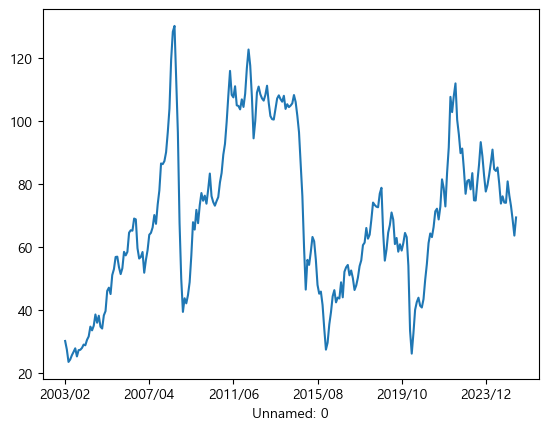

In [129]:
temp['dubai'].plot()

<Axes: xlabel='Unnamed: 0'>

c:\Users\tmdal\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\tmdal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


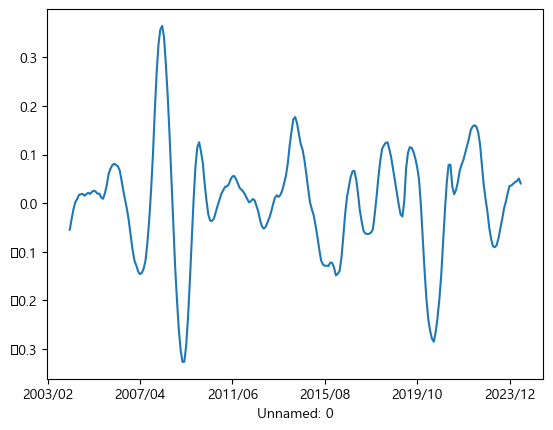

In [130]:
temp['wti_filtered'].plot()

In [131]:
for i in range(7):
    x = sm.add_constant(temp['wti_filtered']).shift(i)
    y = temp['ipi_filtered']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')

lag: 0 
 r-square: 0.5783703777296413 
 rmse: 0.0057157293727167335
lag: 1 
 r-square: 0.45920194202496867 
 rmse: 0.006478271669031852
lag: 2 
 r-square: 0.2966082977560951 
 rmse: 0.007399019627622914
lag: 3 
 r-square: 0.14001458569010472 
 rmse: 0.008195949072070122
lag: 4 
 r-square: 0.03306138633605071 
 rmse: 0.00870827923003507
lag: 5 
 r-square: 0.0002405004836576463 
 rmse: 0.008873301025100068
lag: 6 
 r-square: 0.04042503413223153 
 rmse: 0.008710228930656719


In [132]:
for i in range(7):
    x = sm.add_constant(temp['brent_filtered']).shift(i)
    y = temp['ipi_filtered']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')

lag: 0 
 r-square: 0.5667669381905335 
 rmse: 0.0057938453136429065
lag: 1 
 r-square: 0.449700545342706 
 rmse: 0.00653493294900496
lag: 2 
 r-square: 0.29072367728583703 
 rmse: 0.00742990550221763
lag: 3 
 r-square: 0.13753261509424897 
 rmse: 0.008207767556584597
lag: 4 
 r-square: 0.03270588662716767 
 rmse: 0.008709879903642501
lag: 5 
 r-square: 0.00019944405937033505 
 rmse: 0.00887348322005385
lag: 6 
 r-square: 0.039042395466722946 
 rmse: 0.008716501897684213


In [133]:
oil_source = pd.read_csv(dir+'/data/한국석유공사_국내 원유수입_국가별_20241231.csv', encoding='cp949')

In [134]:
oil_source

,년,중국(물량),중국(금액),중국(단가),필리핀(물량),필리핀(금액),필리핀(단가),태국(물량),태국(금액),태국(단가),...,오만(단가),중립지대(물량),중립지대(금액),중립지대(단가),노르웨이(물량),노르웨이(금액),노르웨이(단가),영국(물량),영국(금액),영국(단가)
0,1980,266.0,8503.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5880.0,183088.0,31.00,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3047.0,108154.0,35.00,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1688.0,51973.0,31.00,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.00,1874.0,51492.0,27.00,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.00,1374.0,38411.0,28.00,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.00,4065.0,108217.0,27.00,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,NaN,NaN,NaN,NaN,NaN,NaN,440.0,6539.0,15.00,...,16.00,3689.0,49391.0,13.00,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.00,3280.0,50452.0,15.00,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,3444.0,41065.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,8099.0,119583.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,...,17.00,14526.0,231274.0,16.00,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
oil_source.fillna(0, inplace=True)

In [136]:
drops = [col for col in oil_source.columns if col.endswith('(물량)')]
oil_source.drop(columns=drops, inplace=True)

In [137]:
oil_source

,년,중국(금액),중국(단가),필리핀(금액),필리핀(단가),태국(금액),태국(단가),말레이시아(금액),말레이시아(단가),인도네시아(금액),...,예멘(금액),예멘(단가),오만(금액),오만(단가),중립지대(금액),중립지대(단가),노르웨이(금액),노르웨이(단가),영국(금액),영국(단가)
0,1980,8503.0,32.0,0.0,0.00,0.0,0.00,15928,40.00,0.0,...,0.0,0.0,0.0,0.00,183088.0,31.00,0.0,0.00,0.0,0.00
1,1981,0.0,0.0,0.0,0.00,0.0,0.00,91311,40.00,92342.0,...,0.0,0.0,0.0,0.00,108154.0,35.00,0.0,0.00,0.0,0.00
2,1982,0.0,0.0,0.0,0.00,0.0,0.00,72541,35.00,520649.0,...,0.0,0.0,0.0,0.00,51973.0,31.00,0.0,0.00,0.0,0.00
3,1983,0.0,0.0,0.0,0.00,0.0,0.00,281496,30.00,272184.0,...,0.0,0.0,548451.0,31.00,51492.0,27.00,0.0,0.00,0.0,0.00
4,1984,0.0,0.0,0.0,0.00,0.0,0.00,447473,29.00,495519.0,...,0.0,0.0,718569.0,30.00,38411.0,28.00,0.0,0.00,0.0,0.00
5,1985,0.0,0.0,0.0,0.00,0.0,0.00,548281,28.00,545668.0,...,0.0,0.0,661222.0,29.00,108217.0,27.00,0.0,0.00,0.0,0.00
6,1986,0.0,0.0,0.0,0.00,6539.0,15.00,343580,15.00,256526.0,...,0.0,0.0,414044.0,16.00,49391.0,13.00,0.0,0.00,0.0,0.00
7,1987,0.0,0.0,0.0,0.00,0.0,0.00,376879,18.00,321174.0,...,0.0,0.0,514859.0,18.00,50452.0,15.00,0.0,0.00,0.0,0.00
8,1988,41065.0,12.0,0.0,0.00,0.0,0.00,351745,16.00,198719.0,...,139551.0,16.0,749661.0,15.00,0.0,0.00,0.0,0.00,0.0,0.00
9,1989,119583.0,15.0,0.0,0.00,0.0,0.00,502794,18.00,216583.0,...,80002.0,18.0,1107824.0,17.00,231274.0,16.00,0.0,0.00,0.0,0.00


In [138]:
oil_source = oil_source.set_index('년')

In [139]:
 def find_top_5_sources(row):
    # 1. Select only the numeric data in the row to perform calculations
    # 2. Get the 5 largest values from the numeric data
    top_5 = row.nlargest(5)
    total = row.sum()
    # 3. Return a list of (column_name, value) tuples
    return list(zip(top_5.index,top_5.values, top_5.values/total))

In [140]:
t5 = oil_source.iloc[0].nlargest(5).sum()
total = oil_source.iloc[0].sum()
others = total-t5
pct = others/total
pct

np.float64(0.008540547305658135)

In [141]:
def get_others(row):
    top_5 = row.nlargest(5).sum()
    total = row.sum()
    others = total-top_5
    return ('others', others, others/total)

In [142]:
top_5_results = oil_source.apply(find_top_5_sources, axis=1)

In [143]:
others = oil_source.apply(get_others, axis=1)

In [144]:
others

년
1980              (others, 44083.0, 0.008540547305658135)
1981              (others, 475015.0, 0.07797963925623891)
1982              (others, 722240.0, 0.12348691174491773)
1983             (others, 1647332.0, 0.28557654119144454)
1984               (others, 1984697.0, 0.342609306896544)
1985              (others, 2202620.0, 0.4004698833055247)
1986              (others, 1401817.0, 0.4180116152025802)
1987              (others, 1353234.0, 0.3572573399992238)
1988             (others, 1354880.0, 0.35392145748099496)
1989             (others, 1622408.0, 0.33369608343019125)
1990              (others, 1895372.0, 0.2933054827765982)
1991             (others, 1648854.0, 0.21933853930478292)
1992              (others, 2459291.0, 0.2604189676091539)
1993              (others, 2631757.0, 0.2830257993447864)
1994             (others, 2875838.0, 0.32241088132996826)
1995               (others, 3030836.0, 0.279987229452666)
1996             (others, 4188322.0, 0.28850412536758546)
1997        

In [145]:
top_5_results

년
1980    [(사우디아라비아(금액), 2935219.0, 0.5686631291419949),...
1981    [(사우디아라비아(금액), 3362304.0, 0.55196415479471), (...
1982    [(사우디아라비아(금액), 2845797.0, 0.48656773784746293)...
1983    [(사우디아라비아(금액), 1771699.0, 0.30713643178930605)...
1984    [(이란(금액), 1089370.0, 0.18805303814833604), (사우...
1985    [(이란(금액), 923542.0, 0.16791401011874535), (오만(...
1986    [(이란(금액), 512795.0, 0.15291173257123228), (오만(...
1987    [(사우디아라비아(금액), 547187.0, 0.14445880912107978),...
1988    [(오만(금액), 749661.0, 0.1958262825760659), (아랍에미...
1989    [(오만(금액), 1107824.0, 0.22785669814865817), (아랍...
1990    [(오만(금액), 1352747.0, 0.209335218579569), (아랍에미...
1991    [(사우디아라비아(금액), 2441024.0, 0.3247168266977661),...
1992    [(사우디아라비아(금액), 2754762.0, 0.2917069497058006),...
1993    [(사우디아라비아(금액), 2707529.0, 0.2911745117327284),...
1994    [(사우디아라비아(금액), 2685629.0, 0.301086505156174), ...
1995    [(사우디아라비아(금액), 3939872.0, 0.3639635551637021),...
1996    [(사우디아라비아(금액), 5060638.0, 0.34859185611611687)...
1997    [(사우

In [146]:
top_5_df = pd.DataFrame(top_5_results.tolist(),
                        index=oil_source.index,
                        columns=[f'Rank_{i+1}' for i in range(5)])
print(top_5_df)

                                              Rank_1  \
년                                                      
1980    (사우디아라비아(금액), 2935219.0, 0.5686631291419949)   
1981      (사우디아라비아(금액), 3362304.0, 0.55196415479471)   
1982   (사우디아라비아(금액), 2845797.0, 0.48656773784746293)   
1983   (사우디아라비아(금액), 1771699.0, 0.30713643178930605)   
1984        (이란(금액), 1089370.0, 0.18805303814833604)   
1985         (이란(금액), 923542.0, 0.16791401011874535)   
1986         (이란(금액), 512795.0, 0.15291173257123228)   
1987    (사우디아라비아(금액), 547187.0, 0.14445880912107978)   
1988          (오만(금액), 749661.0, 0.1958262825760659)   
1989        (오만(금액), 1107824.0, 0.22785669814865817)   
1990          (오만(금액), 1352747.0, 0.209335218579569)   
1991    (사우디아라비아(금액), 2441024.0, 0.3247168266977661)   
1992    (사우디아라비아(금액), 2754762.0, 0.2917069497058006)   
1993    (사우디아라비아(금액), 2707529.0, 0.2911745117327284)   
1994     (사우디아라비아(금액), 2685629.0, 0.301086505156174)   
1995    (사우디아라비아(금액), 3939872.0, 0.3639635551637

In [147]:
top_5_df['others'] = others

In [148]:
top_5_df

,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,others
년,,,,,,
1980,"(사우디아라비아(금액), 2935219.0, 0.5686631291419949)","(쿠웨이트(금액), 1420341.0, 0.2751738652239135)","(이란(금액), 556705.0, 0.10785485079954657)","(중립지대(금액), 183088.0, 0.03547108239226769)","(에콰도르(금액), 22177.0, 0.004296525136619115)","(others, 44083.0, 0.008540547305658135)"
1981,"(사우디아라비아(금액), 3362304.0, 0.55196415479471)","(쿠웨이트(금액), 1333636.0, 0.21893298986165372)","(이란(금액), 546484.0, 0.08971216736167588)","(에콰도르(금액), 215458.0, 0.03537011908017794)","(아랍에미레이트(금액), 158629.0, 0.02604092964554366)","(others, 475015.0, 0.07797963925623891)"
1982,"(사우디아라비아(금액), 2845797.0, 0.48656773784746293)","(쿠웨이트(금액), 728471.0, 0.12455227360120177)","(이란(금액), 706059.0, 0.12072032208089398)","(인도네시아(금액), 520649.0, 0.08901935244943464)","(에콰도르(금액), 325501.0, 0.05565340227608893)","(others, 722240.0, 0.12348691174491773)"
1983,"(사우디아라비아(금액), 1771699.0, 0.30713643178930605)","(이란(금액), 903519.0, 0.15663134748839505)","(쿠웨이트(금액), 605500.0, 0.10496766631827688)","(오만(금액), 548451.0, 0.09507782255974445)","(리비아(금액), 291942.0, 0.05061019065283301)","(others, 1647332.0, 0.28557654119144454)"
1984,"(이란(금액), 1089370.0, 0.18805303814833604)","(사우디아라비아(금액), 1050990.0, 0.18142767155651404)","(오만(금액), 718569.0, 0.1240433310713639)","(인도네시아(금액), 495519.0, 0.08553921386693716)","(쿠웨이트(금액), 453742.0, 0.07832743846030485)","(others, 1984697.0, 0.342609306896544)"
1985,"(이란(금액), 923542.0, 0.16791401011874535)","(오만(금액), 661222.0, 0.12022023643617404)","(에콰도르(금액), 612363.0, 0.11133692563883966)","(아랍에미레이트(금액), 552061.0, 0.10037310305342331)","(말레이시아(금액), 548281.0, 0.09968584144729295)","(others, 2202620.0, 0.4004698833055247)"
1986,"(이란(금액), 512795.0, 0.15291173257123228)","(오만(금액), 414044.0, 0.12346490391037997)","(아랍에미레이트(금액), 387813.0, 0.11564301083990153)","(말레이시아(금액), 343580.0, 0.1024530525391706)","(에콰도르(금액), 293487.0, 0.08751568493673544)","(others, 1401817.0, 0.4180116152025802)"
1987,"(사우디아라비아(금액), 547187.0, 0.14445880912107978)","(이란(금액), 538852.0, 0.14225834716927135)","(오만(금액), 514859.0, 0.13592413197914063)","(아랍에미레이트(금액), 456830.0, 0.12060432314872774)","(말레이시아(금액), 376879.0, 0.09949704858255666)","(others, 1353234.0, 0.3572573399992238)"
1988,"(오만(금액), 749661.0, 0.1958262825760659)","(아랍에미레이트(금액), 586490.0, 0.15320278961828998)","(이란(금액), 511660.0, 0.13365571337293775)","(말레이시아(금액), 351745.0, 0.09188275202353904)","(에콰도르(금액), 273758.0, 0.0715110049281724)","(others, 1354880.0, 0.35392145748099496)"


In [149]:
top_5_df.loc[2020]['Rank_1'][0].replace('(금액)', '')

'사우디아라비아'

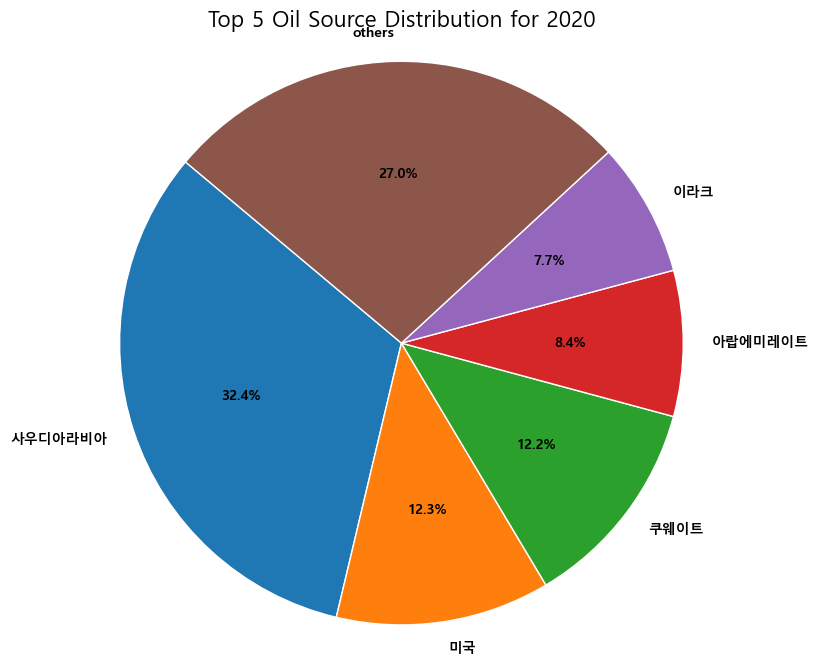

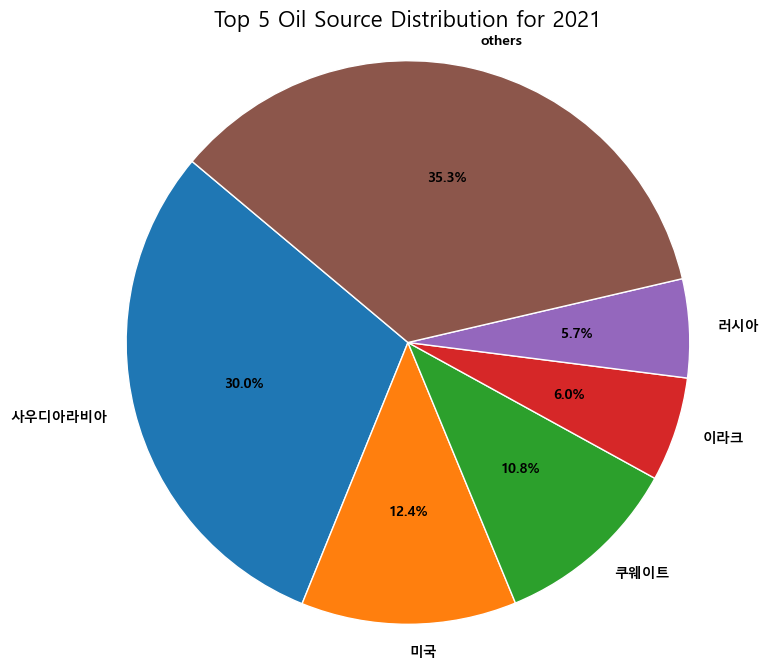

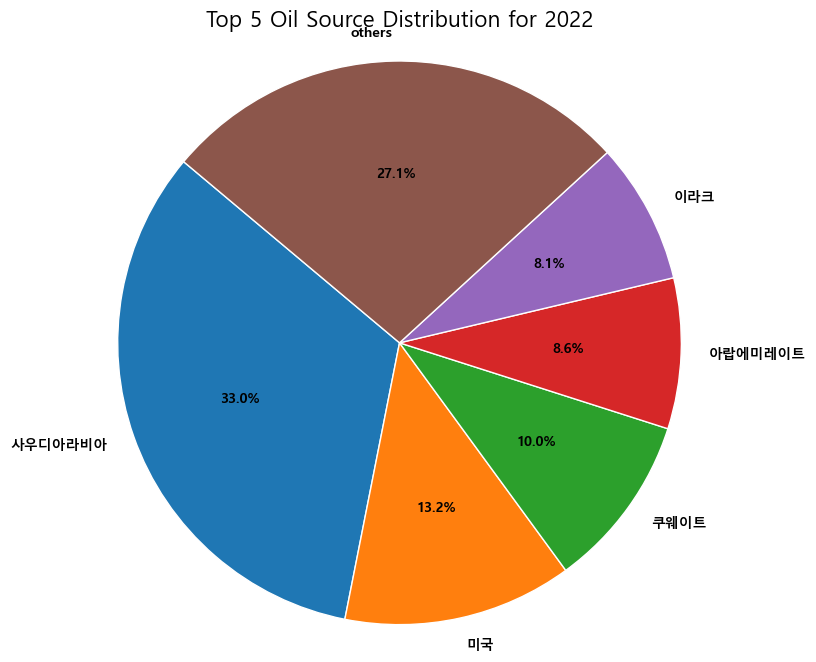

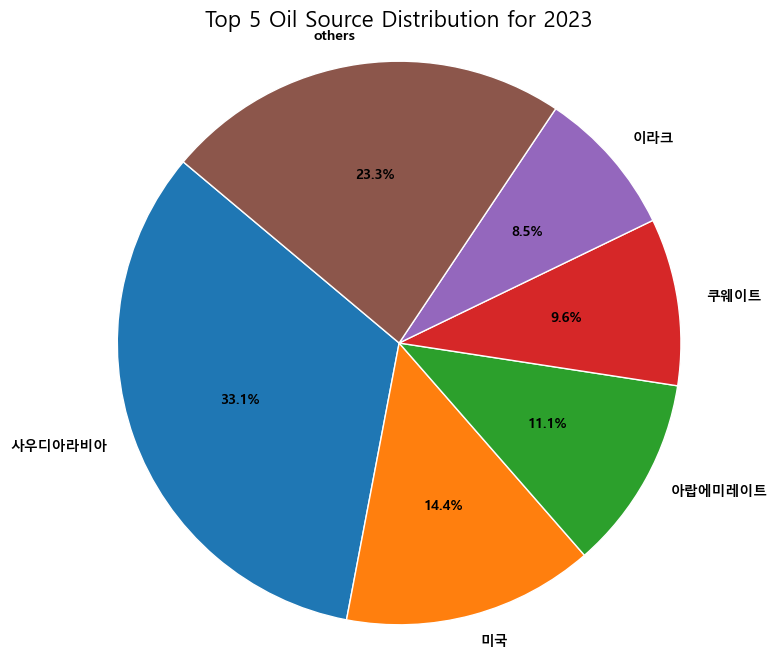

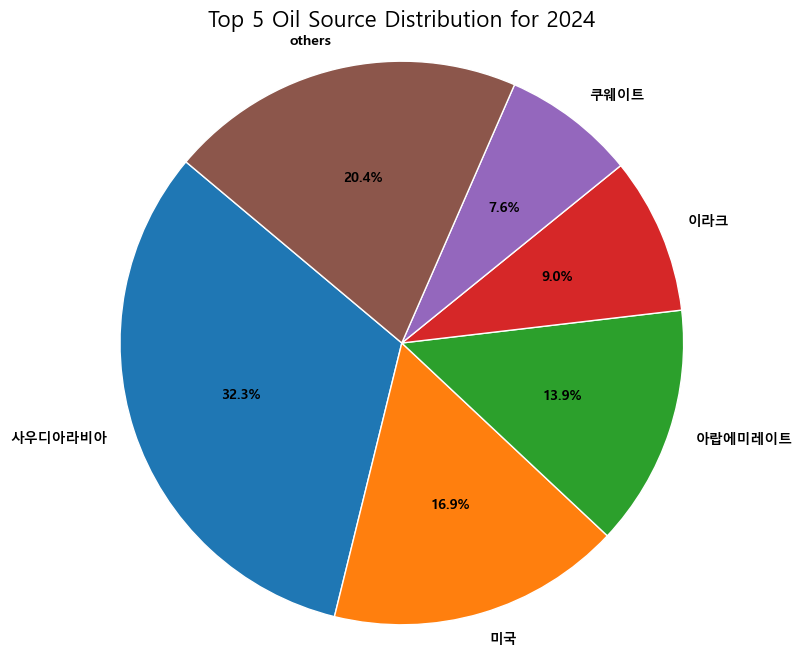

In [150]:
years_to_plot = range(2020, 2025)
plt.rcParams['font.family'] = 'Malgun Gothic'
for year in years_to_plot:
    if year in top_5_df.index:
        year_data = top_5_df.loc[year]
        sources = [item[0].replace('(금액)', '') for item in year_data]
        values = [item[2] for item in year_data]
        labels_inside = [f'{s}\n({v:.1f}%)' for s, v in zip(sources, values)]
        plt.figure(figsize=(8, 8))
        plt.pie(values, labels=sources,autopct='%1.1f%%',
                 startangle=140,
                 wedgeprops={'edgecolor':'white', 'linewidth': 1},
                 textprops={'color':'black', 'weight':'bold'})
        plt.title(f'Top 5 Oil Source Distribution for {year}', fontsize=16)
        plt.axis('equal')
        plt.show()


In [151]:
sources

['사우디아라비아', '미국', '아랍에미레이트', '이라크', '쿠웨이트', 'others']

In [152]:
values

[np.float64(0.3226840826068179),
 np.float64(0.16851440924346048),
 np.float64(0.13854122064372337),
 np.float64(0.08977751305057032),
 np.float64(0.07610777693157343),
 np.float64(0.20437499752385446)]

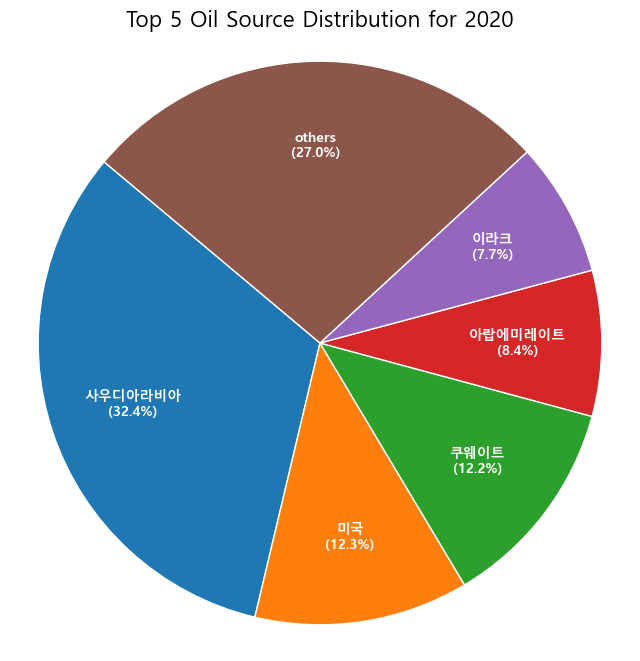

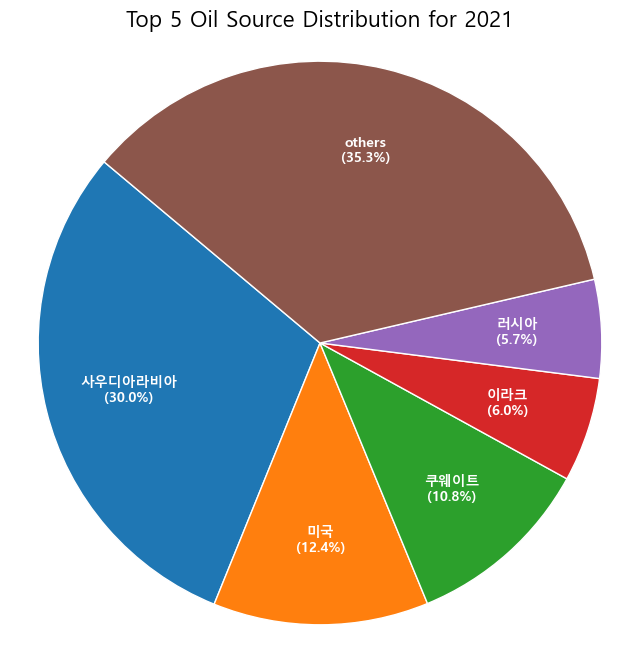

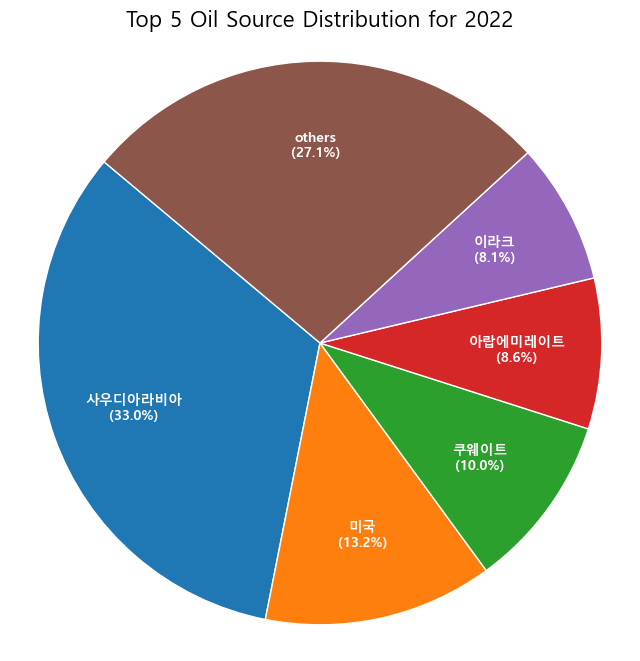

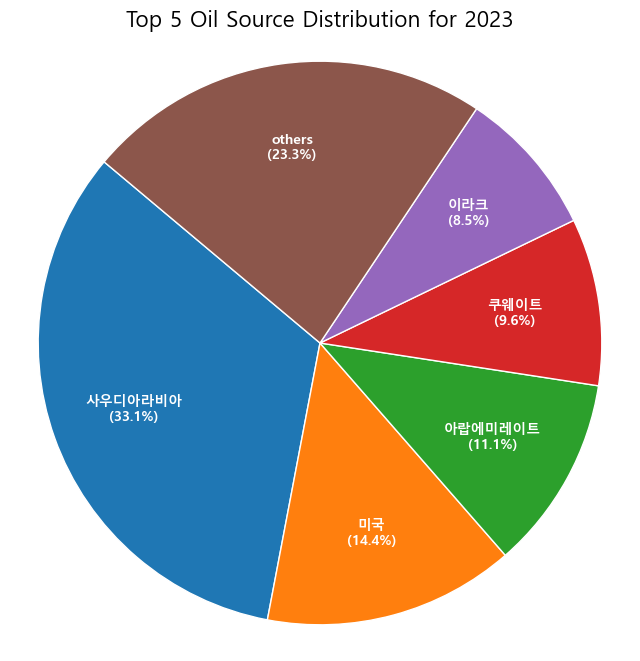

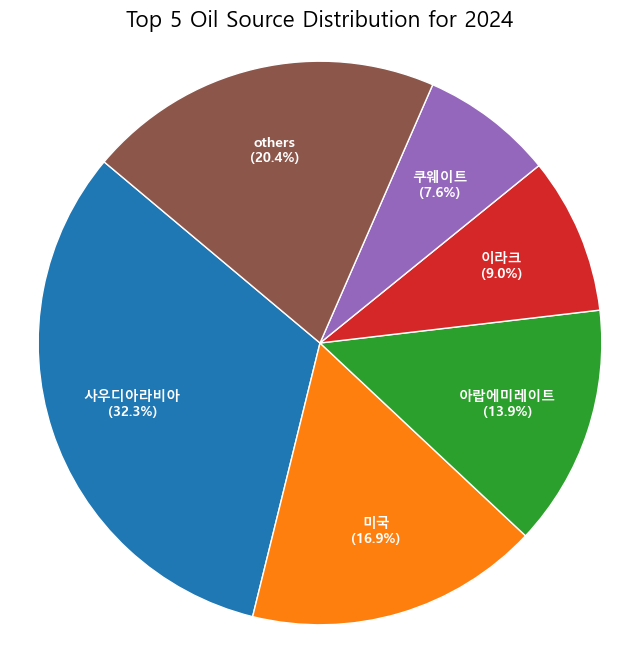

In [153]:
years_to_plot = range(2020, 2025)
plt.rcParams['font.family'] = 'Malgun Gothic'
for year in years_to_plot:
    if year in top_5_df.index:
        year_data = top_5_df.loc[year]
        sources = [item[0].replace('(금액)','') for item in year_data]
        values = [item[2] * 100 for item in year_data]
        fig, ax = plt.subplots(figsize=(8, 8))
        wedges, _ = ax.pie(values, startangle=140,
                           wedgeprops={'edgecolor':'white', 'linewidth': 1})
        labels_to_place = [f'{s}\n({v:.1f}%)' for s, v in zip(sources, values)]
        for i, w in enumerate(wedges):
            angle = (w.theta2 - w.theta1) / 2. + w.theta1
            x = 0.7 * np.cos(np.deg2rad(angle))
            y = 0.7 * np.sin(np.deg2rad(angle))
            ax.text(x, y, labels_to_place[i],
                    ha="center", # Horizontal alignment
                    va="center", # Vertical alignment
                    color="white",
                    weight="bold")
        ax.set_title(f'Top 5 Oil Source Distribution for {year}', fontsize=16)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()


In [154]:
temp.head(40)

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,ipi_2,dubai,ipi_z,dubai_z,wti,brent,wti_filtered,brent_filtered,ipi_filtered,dubai_filtered
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,NaN,30.20,-1.918017,-1.586935,35.92,32.66,NaN,NaN,NaN,NaN
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,0.6,27.52,-1.877867,-1.693593,33.22,30.17,NaN,NaN,NaN,NaN
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,0.1,23.56,-1.871175,-1.851191,28.36,25.04,NaN,NaN,NaN,NaN
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,0.0,24.32,-1.871175,-1.820945,28.22,25.71,NaN,NaN,NaN,NaN
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,0.9,25.67,-1.810950,-1.767218,30.72,27.57,NaN,NaN,NaN,NaN
2003/07,62.8,91.2,89.3,91.6,90.8,90.3,87.3,88.3,90.5,93.3,...,-0.5,26.73,-1.844409,-1.725033,30.75,28.50,NaN,NaN,NaN,NaN
2003/08,63.6,90.3,88.4,94.6,88.6,90.3,81.9,90.2,88.2,92.5,...,0.8,27.87,-1.790875,-1.679664,31.59,29.72,NaN,NaN,NaN,NaN
2003/09,63.6,98.3,95.6,103.6,94.1,96.8,93.7,101.8,93.5,101.1,...,0.0,25.30,-1.790875,-1.781944,28.45,27.04,NaN,NaN,NaN,NaN
2003/10,64.2,98.7,100.0,102.0,100.5,101.3,96.7,102.3,99.0,98.4,...,0.6,27.29,-1.750725,-1.702746,30.33,29.44,NaN,NaN,NaN,NaN


In [156]:
l_cor = ['ipi','dubai', 'brent', 'wti']
for a in l_cor:
    mu = temp[a].mean()
    std = temp[a].std()
    temp[a+'_z'] = (temp[a] - mu)/std


In [157]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,ipi_z,dubai_z,wti,brent,wti_filtered,brent_filtered,ipi_filtered,dubai_filtered,brent_z,wti_z
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,-1.918017,-1.586935,35.92,32.66,NaN,NaN,NaN,NaN,-1.568044,-1.452955
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,-1.877867,-1.693593,33.22,30.17,NaN,NaN,NaN,NaN,-1.665779,-1.572484
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,-1.871175,-1.851191,28.36,25.04,NaN,NaN,NaN,NaN,-1.867136,-1.787634
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,-1.871175,-1.820945,28.22,25.71,NaN,NaN,NaN,NaN,-1.840838,-1.793832
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,-1.810950,-1.767218,30.72,27.57,NaN,NaN,NaN,NaN,-1.767831,-1.683158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,1.541568,0.248531,71.54,75.19,NaN,NaN,NaN,NaN,0.101295,0.123932
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,1.621868,0.115607,68.24,71.74,NaN,NaN,NaN,NaN,-0.034121,-0.022158
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,1.568334,-0.063084,63.61,66.93,NaN,NaN,NaN,NaN,-0.222917,-0.227127


In [158]:
temp[['ipi_z','dubai_z', 'brent_z', 'wti_z']].corr()

,ipi_z,dubai_z,brent_z,wti_z
ipi_z,1.000000,0.322225,0.278971,0.221668
dubai_z,0.322225,1.000000,0.996585,0.972889
brent_z,0.278971,0.996585,1.000000,0.977041
wti_z,0.221668,0.972889,0.977041,1.000000


In [ ]:
l = ['dubai_filtered', 'brent_filtered', 'wti_filtered']
for a in l:
    x = sm.add_constant(temp[a])
    y = temp['ipi_filtered']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'name: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')

name: dubai_filtered 
 r-square: 0.5735211168396853 
 rmse: 0.00574850437400602 
 coeff: 0.061926015085474705
name: brent_filtered 
 r-square: 0.5667669381905335 
 rmse: 0.0057938453136429065 
 coeff: 0.06151916282938743
name: wti_filtered 
 r-square: 0.5783703777296413 
 rmse: 0.0057157293727167335 
 coeff: 0.05935105777104396


C:\Users\tmdal\AppData\Local\Temp\ipykernel_16452\3709372982.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'name: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')
C:\Users\tmdal\AppData\Local\Temp\ipykernel_16452\3709372982.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'name: {a} \n r-square: {reg.rsquared} \n rmse: {rmse} \n coeff: {reg.params[1]}')
C:\Users\tmdal\AppData\Local\Temp\ipykernel_16452\3709372982.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

In [159]:
def best_lag(a, b, max_lag=12):
    best = (0, abs(a.corr(b)))
    for lag in range(-max_lag, max_lag+1):
        if lag == 0:
            continue
        corr = a.corr(b.shift(lag))
        if pd.notna(corr) and abs(corr) > best[1]:
            best = (lag, corr)
    return best

In [160]:
l = ['dubai_z', 'brent_z', 'wti_z']
for a in l:
    lag, lag_corr = best_lag(temp['ipi_z'], temp[a], max_lag=12)
    print(f"최고 교차상관: lag={lag}개월, corr={round(float(lag_corr),3)}")
    if lag > 0:
        print(f"해석: {a}가 약", lag, "개월 선행.")
    elif lag < 0:
        print("해석: 전산업생산지수가 약", abs(lag), "개월 선행.")
    else:
        print("해석: 유의미한 선행·후행이 크지 않음.")

최고 교차상관: lag=0개월, corr=0.322
해석: 유의미한 선행·후행이 크지 않음.
최고 교차상관: lag=0개월, corr=0.279
해석: 유의미한 선행·후행이 크지 않음.
최고 교차상관: lag=0개월, corr=0.222
해석: 유의미한 선행·후행이 크지 않음.


In [ ]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,ipi_filtered,dubai_filtered,wti,brent,wti_filtered,brent_filtered,ipi_z,dubai_z,brent_z,wti_z
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,NaN,NaN,35.92,32.66,NaN,NaN,-1.918017,-1.586935,-1.568044,-1.452955
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,NaN,NaN,33.22,30.17,NaN,NaN,-1.877867,-1.693593,-1.665779,-1.572484
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,NaN,NaN,28.36,25.04,NaN,NaN,-1.871175,-1.851191,-1.867136,-1.787634
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,NaN,NaN,28.22,25.71,NaN,NaN,-1.871175,-1.820945,-1.840838,-1.793832
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,NaN,NaN,30.72,27.57,NaN,NaN,-1.810950,-1.767218,-1.767831,-1.683158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,NaN,NaN,71.54,75.19,NaN,NaN,1.541568,0.248531,0.101295,0.123932
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,NaN,NaN,68.24,71.74,NaN,NaN,1.621868,0.115607,-0.034121,-0.022158
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,NaN,NaN,63.61,66.93,NaN,NaN,1.568334,-0.063084,-0.222917,-0.227127


In [161]:
import statsmodels.api as sm
ipi['ipi_filtered'] = sm.tsa.filters.bkfilter(
    np.log(ipi['ipi']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)

In [162]:
mu = temp['dubai_filtered'].mean()
std = temp['dubai_filtered'].std()

temp['dubai_filtered_z'] = (temp['dubai_filtered']-mu)/std

In [163]:
mu = temp['ipi_filtered'].mean()
std = temp['ipi_filtered'].std()

temp['ipi_filtered_z'] = (temp['ipi_filtered']-mu)/std

In [165]:
lag, lag_corr = best_lag(temp['ipi_filtered_z'], temp['dubai_filtered_z'], max_lag=12)
print(f"최고 교차상관: lag={lag}개월, corr={round(float(lag_corr),3)}")
if lag > 0:
    print(f"해석: {a}가 약", lag, "개월 선행.")
elif lag < 0:
    print("해석: 전산업생산지수가 약", abs(lag), "개월 선행.")
else:
    print("해석: 유의미한 선행·후행이 크지 않음.")

최고 교차상관: lag=-1개월, corr=0.785
해석: 전산업생산지수가 약 1 개월 선행.


In [ ]:
def best_lag(a, b, max_lag=12):
    best = (0, abs(a.corr(b)))
    for lag in range(-max_lag, max_lag+1):
        if lag == 0:
            continue
        corr = a.corr(b.shift(lag))
        if pd.notna(corr) and abs(corr) > best[1]:
            best = (lag, corr)
    return best

In [177]:
lags = []
correl = []
for i in range(-12,13):
    results = temp['ipi_filtered_z'].corr(temp['dubai_filtered_z'].shift(i))
    lags.append(i)
    correl.append(results)
    print(i, results)


-12 -0.3333521841423592
-11 -0.30426255615106484
-10 -0.2413948466245768
-9 -0.14584214974409987
-8 -0.021803317861025757
-7 0.12321519579823775
-6 0.278406664276735
-5 0.4318676840461582
-4 0.5711951574360401
-3 0.6839079187082977
-2 0.7584860645889893
-1 0.7850224366876356
0 0.757311769907008
1 0.6766455980212642
2 0.5458628558271266
3 0.3771699202464858
4 0.18632231554932824
5 -0.009493470914966941
6 -0.19371276989610037
7 -0.3529264072292093
8 -0.4770191564004666
9 -0.5594457690704917
10 -0.598210158746455
11 -0.5935797930990399
12 -0.5499487959622849


In [179]:
correl

[np.float64(-0.3333521841423592),
 np.float64(-0.30426255615106484),
 np.float64(-0.2413948466245768),
 np.float64(-0.14584214974409987),
 np.float64(-0.021803317861025757),
 np.float64(0.12321519579823775),
 np.float64(0.278406664276735),
 np.float64(0.4318676840461582),
 np.float64(0.5711951574360401),
 np.float64(0.6839079187082977),
 np.float64(0.7584860645889893),
 np.float64(0.7850224366876356),
 np.float64(0.757311769907008),
 np.float64(0.6766455980212642),
 np.float64(0.5458628558271266),
 np.float64(0.3771699202464858),
 np.float64(0.18632231554932824),
 np.float64(-0.009493470914966941),
 np.float64(-0.19371276989610037),
 np.float64(-0.3529264072292093),
 np.float64(-0.4770191564004666),
 np.float64(-0.5594457690704917),
 np.float64(-0.598210158746455),
 np.float64(-0.5935797930990399),
 np.float64(-0.5499487959622849)]

In [181]:
results = pd.DataFrame(index=lags, data = correl)

In [184]:
results.columns = ['correlation']

<Axes: >

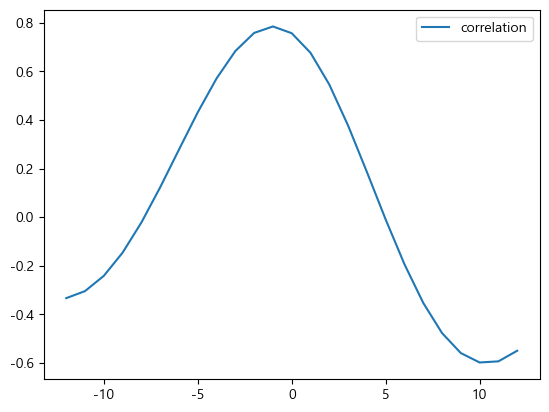

In [185]:
plt.rcParams['axes.unicode_minus'] = False 
results.plot()

In [186]:
np.arange(-12,13,3)

array([-12,  -9,  -6,  -3,   0,   3,   6,   9,  12])

In [191]:
4%3

1

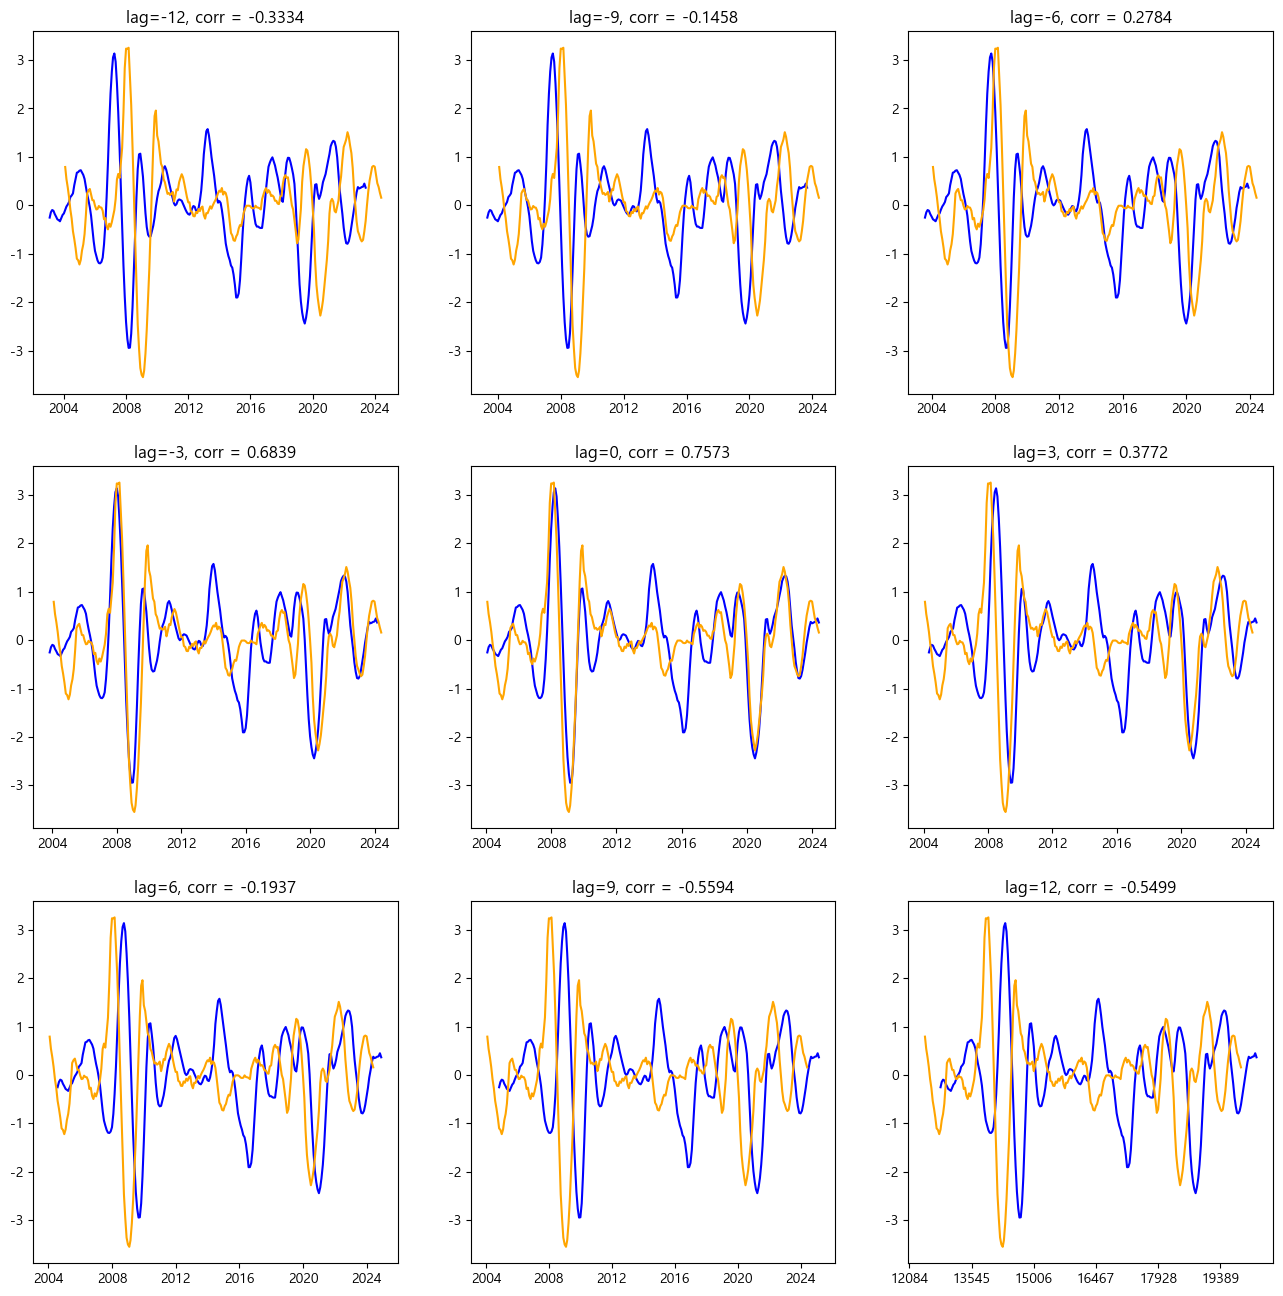

In [218]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
i = 0
j = 0
for a in np.arange(-12,13,3):
    ax = axes[i,j]
    y1 = temp['dubai_filtered_z'].shift(a)
    y2 = temp['ipi_filtered_z']
    x1 = pd.to_datetime(temp['dubai_filtered_z'].index, format='%Y/%m')
    x2 = pd.to_datetime(temp['ipi_filtered_z'].index, format='%Y/%m')
    corr = round(y1.corr(y2),4)
    ax.plot(x1, y1, label = f'dubai with lag={a}', color='blue')
    ax.plot(x2, y2, label = f'ipi', color='orange')
    ax.set_title(f'lag={a}, corr = {corr}')
    plt.xticks(x1[::48])
    if j == 2:
        i += 1
    else:
        i = i
    
    if j < 2:
        j += 1
    else:
        j = (j+1)%3

C:\Users\tmdal\AppData\Local\Temp\ipykernel_27256\1219638395.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.legend(); plt.tight_layout(); plt.show()
c:\Users\tmdal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


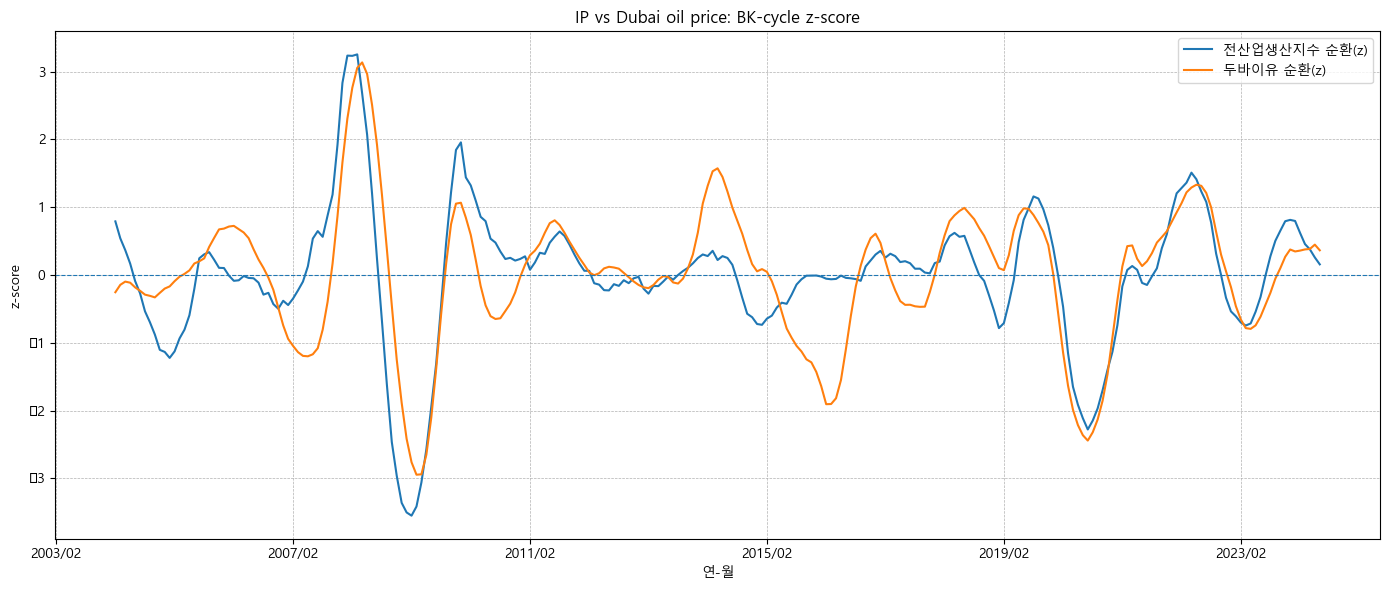

In [164]:
# 그래프
plt.figure(figsize=(14,6))
plt.plot(temp['ipi_filtered_z'].index, temp['ipi_filtered_z'].values, label='전산업생산지수 순환(z)')
plt.plot(temp['dubai_filtered_z'].index, temp['dubai_filtered_z'].values, label='두바이유 순환(z)')
plt.axhline(0, linestyle='--', linewidth=0.8)
plt.title('IP vs Dubai oil price: BK-cycle z-score')
plt.xlabel('연-월'); plt.ylabel('z-score')
plt.xticks(temp['dubai_filtered_z'].index[::48])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(); plt.tight_layout(); plt.show()

In [ ]:
temp = temp.join(comm['구리'], how='left')

In [ ]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,brent,wti_filtered,brent_filtered,ipi_z,dubai_z,brent_z,wti_z,dubai_filtered_z,ipi_filtered_z,구리
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,32.66,NaN,NaN,-1.918017,-1.586935,-1.568044,-1.452955,NaN,NaN,1682.15
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,30.17,NaN,NaN,-1.877867,-1.693593,-1.665779,-1.572484,NaN,NaN,1655.69
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,25.04,NaN,NaN,-1.871175,-1.851191,-1.867136,-1.787634,NaN,NaN,1587.87
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,25.71,NaN,NaN,-1.871175,-1.820945,-1.840838,-1.793832,NaN,NaN,1651.10
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,27.57,NaN,NaN,-1.810950,-1.767218,-1.767831,-1.683158,NaN,NaN,1685.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,75.19,NaN,NaN,1.541568,0.248531,0.101295,0.123932,NaN,NaN,9330.98
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,71.74,NaN,NaN,1.621868,0.115607,-0.034121,-0.022158,NaN,NaN,9735.82
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,66.93,NaN,NaN,1.568334,-0.063084,-0.222917,-0.227127,NaN,NaN,9172.70


In [ ]:
import statsmodels.api as sm
temp['copper_filtered'] = sm.tsa.filters.bkfilter(
    np.log(temp['구리']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)

In [ ]:
mu = temp['copper_filtered'].mean()
std = temp['copper_filtered'].std()

temp['copper_filtered_z'] = (temp['copper_filtered'] - mu)/std

In [ ]:
lag, lag_corr = best_lag(temp['ipi_filtered_z'], temp['copper_filtered_z'], max_lag=12)
print(f"최고 교차상관: lag={lag}개월, corr={round(float(lag_corr),3)}")
if lag > 0:
    print(f"해석: {a}가 약", lag, "개월 선행.")
elif lag < 0:
    print("해석: 전산업생산지수가 약", abs(lag), "개월 선행.")
else:
    print("해석: 유의미한 선행·후행이 크지 않음.")

최고 교차상관: lag=0개월, corr=0.69
해석: 유의미한 선행·후행이 크지 않음.


In [ ]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,...,wti_filtered,brent_filtered,ipi_z,dubai_z,brent_z,wti_z,dubai_filtered_z,ipi_filtered_z,구리,copper_filtered
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,...,NaN,NaN,-1.918017,-1.586935,-1.568044,-1.452955,NaN,NaN,1682.15,NaN
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,...,NaN,NaN,-1.877867,-1.693593,-1.665779,-1.572484,NaN,NaN,1655.69,NaN
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,...,NaN,NaN,-1.871175,-1.851191,-1.867136,-1.787634,NaN,NaN,1587.87,NaN
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,...,NaN,NaN,-1.871175,-1.820945,-1.840838,-1.793832,NaN,NaN,1651.10,NaN
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,...,NaN,NaN,-1.810950,-1.767218,-1.767831,-1.683158,NaN,NaN,1685.11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,...,NaN,NaN,1.541568,0.248531,0.101295,0.123932,NaN,NaN,9330.98,NaN
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,...,NaN,NaN,1.621868,0.115607,-0.034121,-0.022158,NaN,NaN,9735.82,NaN
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,...,NaN,NaN,1.568334,-0.063084,-0.222917,-0.227127,NaN,NaN,9172.70,NaN


In [ ]:
sm.add_constant(temp['copper_filtered_z'])
y = temp['ipi_filtered_z']
reg = sm.OLS(y, x, missing='drop').fit()
rmse = np.sqrt(reg.mse_resid)
print(f'name: {a} \n r-square: {reg.rsquared} \n rmse: {rmse}')


name: wti_z 
 r-square: 0.5783703777296414 
 rmse: 0.650664831996147


C:\Users\tmdal\AppData\Local\Temp\ipykernel_16452\3831069448.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.legend(); plt.tight_layout(); plt.show()


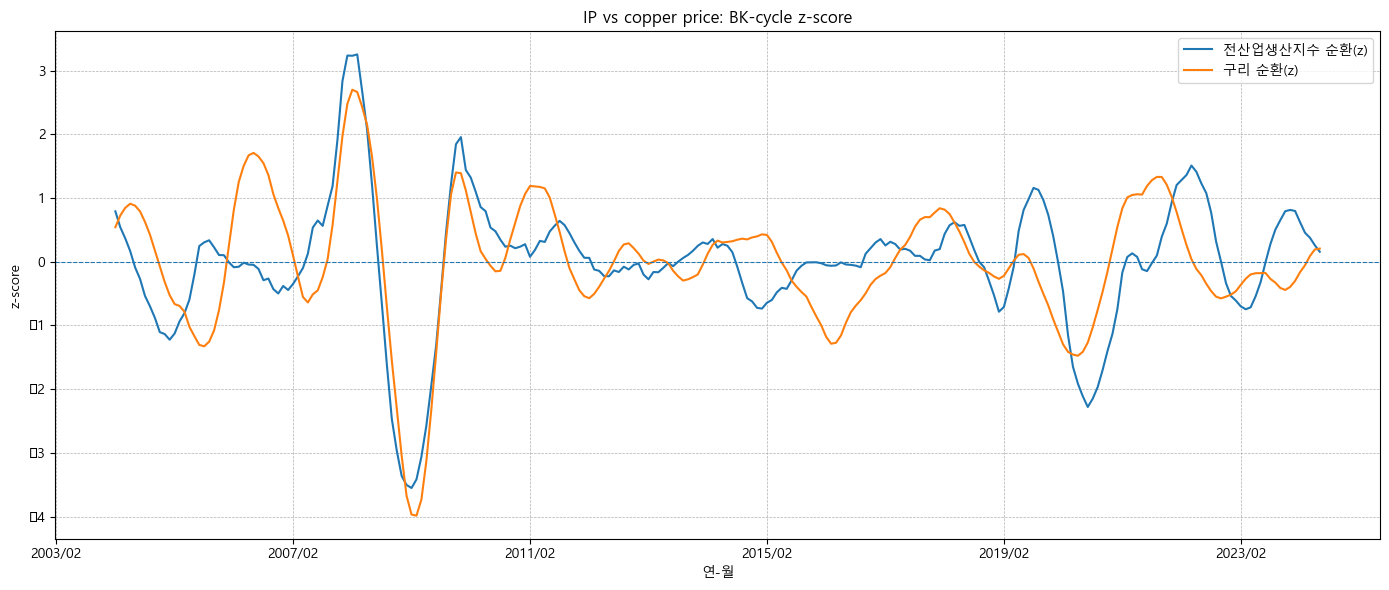

In [ ]:
# 그래프
plt.figure(figsize=(14,6))
plt.plot(temp['ipi_filtered_z'].index, temp['ipi_filtered_z'].values, label='전산업생산지수 순환(z)')
plt.plot(temp['copper_filtered_z'].index, temp['copper_filtered_z'].values, label='구리 순환(z)')
plt.axhline(0, linestyle='--', linewidth=0.8)
plt.title('IP vs copper price: BK-cycle z-score')
plt.xlabel('연-월'); plt.ylabel('z-score')
plt.xticks(temp['copper_filtered_z'].index[::48])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(); plt.tight_layout(); plt.show()

In [ ]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:           ipi_filtered   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     333.3
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.80e-47
Time:                        23:35:03   Log-Likelihood:                 918.67
No. Observations:                 245   AIC:                            -1833.
Df Residuals:                     243   BIC:                            -1826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.941e-05      0.000      0.080   